In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# Euler's method: y_(n+1) = y_n + hf(x_n, y_n)
# ---- Plot step size 'h' and error on X and Y axes, and check if reducing 'h' reduces the error

class ODE:
    def __init__(self, x0, x_end, y0):
        self.x0 = x0
        self.x_end = x_end
        self.y0 = y0

    def f_ode(self, x_point, y_point):
        return (x_point + y_point)

    # Analytical Solution
    def f_actual(self, x_point):
        return (2 * np.exp(x_point) - x_point - 1)

    def eulers_method(self, h):
        n = int((self.x_end - self.x0) / h)
        x = np.linspace(self.x0, self.x_end, n + 1)
        y = np.zeros(n + 1)
        y0 = self.y0

        for i in range(n):
            y[i + 1] = y[i] + h * self.f_ode(x[i], y[i])

        return x, y

    def compare_error(self):
        h_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
        errors = []

        for h in h_values:
            x, y = self.eulers_method(h)
            actual_error = self.f_actual(self.x_end)  
            err = abs(y[-1] - actual_error)  # Considering the absolute error of the last value
            errors.append(err)

        plt.loglog(h_values, errors, marker = 'o')
        plt.title("Error vs Step Size (Euler's Method)")
        plt.xlabel("Step size (h)")
        plt.ylabel(f"Absolute error at x = {self.x_end}")
        plt.show()

        for h_val, err in zip(h_values, errors):
            print(f"h = {h_val:.5f}, Error = {err:.8f}")

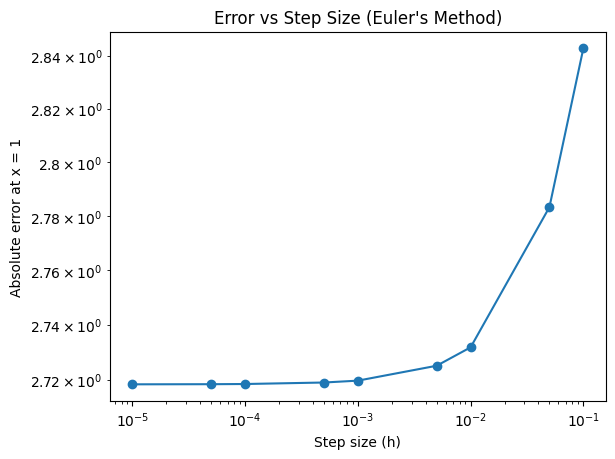

h = 0.10000, Error = 2.84282120
h = 0.05000, Error = 2.78326595
h = 0.01000, Error = 2.73174983
h = 0.00500, Error = 2.72504653
h = 0.00100, Error = 2.71963972
h = 0.00050, Error = 2.71896109
h = 0.00010, Error = 2.71841773
h = 0.00005, Error = 2.71834978
h = 0.00001, Error = 2.71830542


In [83]:
ode_obj = ODE(0, 1, 1)
ode_obj.compare_error()